# [1] Single Linear regression

### Importing the dependencies and libraries 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.model_selection import train_test_split

### importing dataset 

In [7]:
data=pd.read_csv("carprices.csv")

In [8]:
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Select dependent and Independent Variable

In [9]:
data_2 = data.loc[:,['Sell Price($)','Age(yrs)']]

In [10]:
data_2

,Sell Price($),Age(yrs)
0,18000,6
1,34000,3
2,26100,5
3,40000,2
4,31500,4
5,29400,5
6,32000,5
7,19300,6
8,12000,8
9,22000,6


In [11]:
x=pd.DataFrame(data["Sell Price($)"]) # The independent value

In [12]:
x

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [13]:
y=pd.DataFrame(data["Age(yrs)"]) # The dependent value

In [14]:
y

,Age(yrs)
0,6
1,3
2,5
3,2
4,4
5,5
6,5
7,6
8,8
9,6


In [15]:
x.head()

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500


In [16]:
y.head()

,Age(yrs)
0,6
1,3
2,5
3,2
4,4


# Split the dataset for test and train

#### Here test size is 20 % or 0.2 and train is 80%,X,y both has 506 data among them 404 are for training , 102 are for testing each feature has 1 value 

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10, 1), (10, 1), (3, 1), (3, 1))

# naming a model called regressor

In [19]:
regressor = LinearRegression()

# Fit the linear regression model to the training data for best fit

In [20]:
regressor.fit(x_train,y_train)

LinearRegression()

# Calculate the intercept

In [21]:
print(regressor.intercept_)

[10.43415786]


# Calculate the coeffitient

In [22]:
print(regressor.coef_)

[[-0.00019597]]


# Predict the test set Result

In [23]:
y_pred = regressor.predict(x_test)

In [24]:
y_pred

array([[6.3188562 ],
       [6.12288945],
       [6.90675643]])

# Calculate performance indicator

In [25]:
metrics.mean_absolute_error(y_test, y_pred) #identyfing MAE (mean absolute error)

0.5702632297276194

In [26]:
metrics.mean_squared_error(y_test, y_pred) #Identifying MSE (Mean squared Error)

0.43375530953158137

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #Identifying RMSE

0.658601024544892

# Visualize our Test Set Result

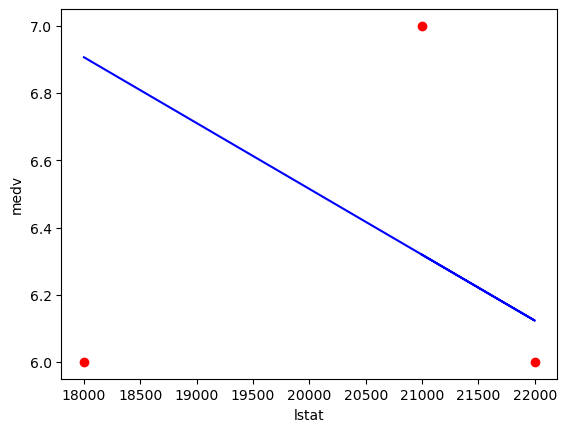

In [28]:
plt.scatter(x_test, y_test, color = 'red' )
plt.plot( x_test, y_pred, color = 'blue' )    
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()

# [2] Multiple Linear Regression

In [114]:
from sklearn.metrics import confusion_matrix # import dependency

In [115]:
dataFrame = pd.read_csv("BostonHousing.csv") # import dataset

In [116]:
dataFrame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [117]:
dataFrame.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [118]:
X = pd.DataFrame(dataFrame.iloc[:,:-1])
y = pd.DataFrame(dataFrame.iloc[:,-1])

In [119]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [120]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [121]:
v = pd.DataFrame(regressor.coef_, index=['Co-efficient: ']).transpose()

In [122]:
v

,Co-efficient:
0,-0.966531


In [123]:
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [124]:
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax


In [125]:
coeff_df = pd.concat([w,v], axis=1, join='inner')

In [126]:
coeff_df

,Attribute,Co-efficient:
0,crim,-0.966531


In [140]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [141]:
y_pred

,Predicted
0,26.099510
1,31.425096
2,17.371736
3,29.501699
4,18.144961
...,...
97,1.617283
98,17.391067
99,14.327164
100,22.407362


In [142]:
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [143]:
test_pred =pd.concat([y_pred,y_train], axis=1, join='inner')

In [144]:
test_pred

,Predicted,medv
1,31.425096,21.6
3,29.501699,33.4
4,18.144961,36.2
5,23.267575,28.7
6,17.120438,22.9
...,...,...
96,25.625910,21.4
97,1.617283,38.7
98,17.391067,43.8
99,14.327164,33.2


In [137]:
metrics.mean_absolute_error(y_test, y_pred)

4.184807930623361

In [138]:
metrics.mean_squared_error(y_test, y_pred)

33.51954917268488

In [139]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.789606996393182